# Project robot

Please fill in the names of the team mebers.

<div class="alert alert-block alert-danger">

<b>Team: 08</b>
- Kim Leon Hofmann
- Sami Goekpinar
- Baran Bickici

<b>Result:</b>

| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-------|
| Points | 2/2 | 2/2 | 4/4 | 1/2 | 2/2 | 2/4 | 4/4 | 17/20 |

</div>

Task 3:

- die erste Funktion in f ergibt beim Weglassen der Klammer ein leicht anderes Ergebnis. Ist aber vermutlich auf intere Rechengenauigkeit zurückzuführen. Kein Punkteabzug.

Task 4:

- das Beispiel mit T=[0,0] im zweiten Teil ist nicht ganz klar. Sie sehen, dass mit verschiedenen Startwerten das Newton Verfahren konvergiert.
- auch im dritten Beispiel hängt die Lösung von den Startwerten ab.
- das erste Beispiel ist ein Beispiel in dem das Newton Verfahren nicht konvergiert. Ein weiteres Beispiel wäre gewesen, wenn alpha und beta =0 sind. Dann ist nämlich die Jakobi Matrix singulär und nicht lösbar.

Task 6:

- Generell: vermeiden Sie Vergleiche gegen Null. Beachten Sie die Maschinengenaugkeit.
- Sie geben auch in den Fällen, in denen nur eine Lösung exisitert trotzdem 2 (identische) Punkte zurück. Diesen Fall, in dem nur eine Lösung exisiert, sollten Sie auch abfangen.
- ich habe Ihnen die Lösung als Referenz hinzugefügt.

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [1]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.9.13


### Display images and videos

In [2]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [3]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 1.21.5


### Matplotlib

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)

matplotlib version = 3.5.2


### Google Colab
If you are using Google Colab mount drive and change directory.

In [5]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/robot'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling
Robots have been used in industrial manufacturing processes for almost 50 years in different areas of application.
An industrial robot is a machine for processing or assembling workpieces that is controlled by computer programs.
Industrial robots are distinguished by the structure of the robot arms, the so-called kinematics.
Robotic arms consist of rigid links that are connected to each other by swivel joints or sliding joints.
The most common robotic arms are 6-axis robots.
They are comparable to the human arm and therefore offer many application possibilities.
Robots have established themselves as an important part of production, particularly in the automotive industry.

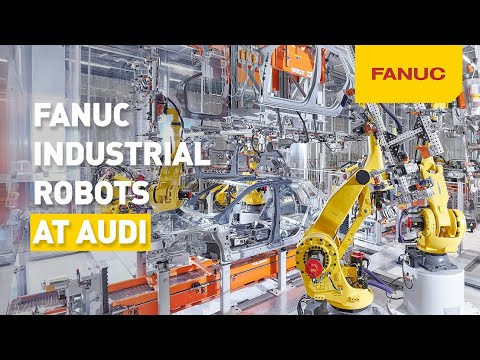

In [6]:
YouTubeVideo('rbki4HR41-4')

In this project we consider a very simplified model, in which the robot consists of two arms that move in one plane.
Swivel joints allow the rotation of the arms.
The arms have a fixed length.
At the end of the second arm, an object hangs vertically downwards, attached to a freely suspended rope.

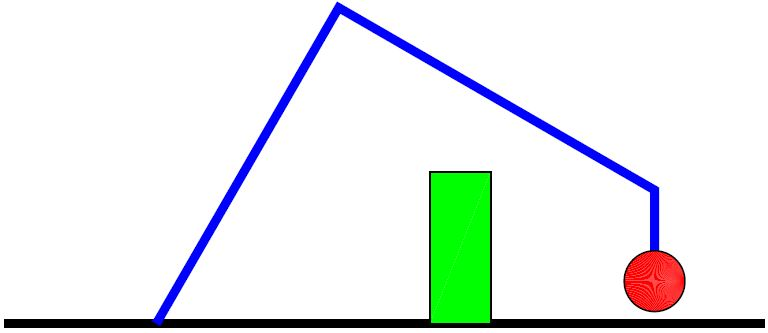

In [7]:
Image('robot_figure1.jpg', width=300, height=150)

By appropriately controlling the two angles on the swivel joints, the gripper can be used to move the object over an obstacle.
The goal is to simulate and visualize different motion sequences for lifting an object over an obstacle.

## 2 Numerical treatment
In order to describe the model with mathematical formulas, we need a detailed technical drawing.

### 2.1 Technical drawing
We do not need a 3D sketch, a 2D sketch is sufficient.
At point $O$ the robot is fixed at the baseline.
The origin of the coordinate system will be placed at this point
with the $x$-axis pointing to the right and the $y$-axis pointing up.
We consider an obstacle in the form of a rectangle with height $h$ and width $w$.
The distance between the obstacle and the origin is denoted by $d$.
The object to be transported over the obstacle is described by a circle with midpoint $M$ and radius $r$.
The positions of the points $P$, $Q$, $R$, $M$ and $T$ depend on the angles $\alpha$ and $\beta$.
$T$ is the point of the object closest to the baseline.

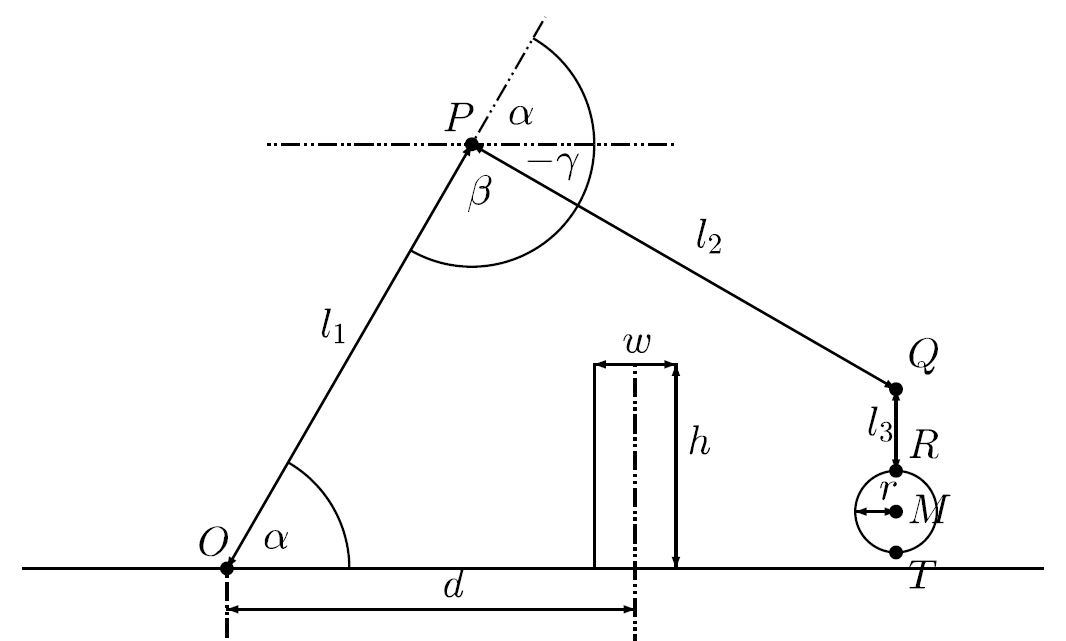

In [8]:
Image('robot_figure2.jpg', width=600, height=300)

### 2.2 Direct kinematics
The positions of the points $P$, $Q$, $R$, $M$ and $T$ is clearly defined by the two joint angles.
This type of control by the angles $\alpha$ and $\beta$ is called direct kinematics.
Our objective is to derive formulars for the positions of the points $P$, $Q$, $R$, $M$ and $T$ as a function of $\alpha$ and $\beta$.
The parameters $l_1$, $l_2$, $l_3$ and $r$ are also included in these formulas.

The position of point $P$ with respect to the position of point $O$ can be calculated using the length $l_1$ and the angle $\alpha$:

$$
P = O +
l_1 \, 
\left(
\begin{array}{c}
\cos{(\alpha)} \\
\sin{(\alpha)} \\
\end{array}
\right)
$$

In order to calculate the position of point $Q$ we use the angle $\gamma$ as shown in the figure above:

$$
\alpha + \beta - \gamma = \pi
\quad \Longrightarrow \quad
\gamma = \alpha + \beta - \pi
$$

The position of point $Q$ with respect to the position of point $Q$ can be calculated using the length $l_2$ and the angle $\gamma$:

$$
Q
= P
+ l_2 \, 
\left(
\begin{array}{c}
\cos{(\gamma)}\\
\sin{(\gamma)}\\
\end{array}
\right)
$$

By a straightforward calculation we get the positions of the points $R$, $M$ and $T$:  

$$
R = Q
+ l_3 \, 
\left(
\begin{array}{r}
 0\\
-1\\
\end{array}
\right),
\quad
M = R
+ r \, 
\left(
\begin{array}{r}
 0\\
-1\\
\end{array}
\right),
\quad
T = M
+ r \, 
\left(
\begin{array}{r}
 0\\
-1\\
\end{array}
\right)
$$

### 2.3 Inverse kinematics
Inverse kinematics is exactly the opposite of direct kinematics.
This means that the position of the point $T(T_x \mid T_y)$ is given and the angles $\alpha$ and $\beta$ are calculated.
If we put together all the formulas of direct kinematics, we get:

$$
    \begin{array}{lcl}
        T_x & = & l_1 \, \cos(\alpha) - l_2 \, \cos(\alpha + \beta)\\
		T_y & = & l_1 \, \sin(\alpha) - l_2 \, \sin(\alpha + \beta) - l_3 - 2 \, r
	\end{array}
$$

Now we have to solve these equations according to $\alpha$ and $\beta$.
We could do that through tricky symbolic calculations.
But we choose another alternative.
We solve the equations using a numerical approximation method.
The standard procedure for this purpose is Newton's method for finding roots.
To this end, we must reformulate the equations.
The problem now is:
Find the common roots $\alpha$ and $\beta$ for the functions $f_1$ and $f_2$:

$$
	\mathbf{f}(\alpha,\beta) = 
	\left(
	\begin{array}{l}
		f_1(\alpha,\beta)\\
		f_2(\alpha,\beta)
	\end{array}
	\right)
	=
	\left(
	\begin{array}{l}
		T_x - l_1 \, \cos(\alpha) + l_2 \, \cos(\alpha + \beta) \\
		T_y - l_1 \, \sin(\alpha) + l_2 \, \sin(\alpha + \beta) + l_3 + 2 \, r
	\end{array}
	\right).
$$

<div class="alert alert-block alert-info">
    
### Task 1: Formula for Jacobian matrix <font color=red>(2 points)</font>

Derive a formula for the Jacobian matrix $\mathbf{J}$ of the function $\mathbf{f}$.
Calculate numerical values of the Jacobian matrix $\mathbf{J}$ for $l_1 = 6$, $l_2 = 6$, $l_3 = 1$,
$\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$
by hand.

</div>

In [9]:
# => Jacobian matrix J "by hand" (partielle Ableitungen für nichtlineare Gleichungen)

# f1(α) = l1 * sin(α) - l2 * sin(α+β) 
# f1(β) = -l2 * sin(α+β) 

# f2(α) = -l1 * cos(α) + l2 * cos(α+β)
# f2(β) = l2 * cos(α+β)

# Initialisierung:
# => l1 = 6; l2 = 6; l3 = 1; 
# => α = π/3; β = π/2

# Werte einsetzen:
# f1(α) = 2,196152423
# f1(β) = -3
# f2(α) = -8,196152423
# f2(β) = -5,196152423

# Jacobian matrix "J" aufstellen:

#          | f1(α)  f1(β) |   | 2,196152423   -3           |
# J(α,β) = |              | = |                            |
#          | f2(α)  f2(β) |   | -8,196152423  -5,196152423 |

<div class="alert alert-block alert-success">
    
<b>Solution of Task 1</b>

Formula for Jacobian matrix

$$
	\boldsymbol{J} \, (\alpha,\beta) = 
	\left(
		\begin{array}{ll}
			l_1 \, \sin(\alpha) - l_2 \, \sin(\alpha + \beta) & -l_2 \, \sin(\alpha + \beta) \\
			- l_1 \, \cos(\alpha) + l_2 \, \cos(\alpha + \beta) & l_2 \, \cos(\alpha + \beta) \\
		\end{array}
	\right)
$$
    
Numerical values of the Jacobian matrix $J$ for $l_1 = 6$, $l_2 = 6$, $\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$
    
$$
    \boldsymbol{J} \, (1.04719755,1.57079633) \approx
	\left(
		\begin{array}{rr}
			2.196 & −3 \\
			-8.196 & -5.196 \\
		\end{array}
	\right)
$$
    
</div>

### 2.4 Path planing
The movement of the object should take place along a predetermined trajectory for the positions of point $T$.

The simplest trajectory consists of a rectangular movement.
The object is first lifted vertically from the floor until the height of the obstacle is reached.
Then the object is moved horizontally over the obstacle.
Finally, the object is placed vertically down on the floor.

Other alternatives are trajectory curves in the form of semicircles or parabolas.

### 2.5 Collision detection
One of the most important tasks when simulating robots is to make sure that there are no collisions.
Collisions can occur in different forms.
The object could collide with the obstacle, with an arm, or with the ground.

Functions that intersect straight lines with straight lines or with circles form the mathematical basis of collision checks.

We take a closer look at the calculation of the intersection of a straight line with a circle.
We represent a straight line with the constants $a$, $b$ and $c$ with the equation

$$
a \, x + b \, y = c
$$

and a circle with midpoint $M(x_0 \mid y_0)$ and radius $r$ with the equation

$$
(x - x_0)^2 + (y - y_0)^2 = r^2
$$

We use the transformation

$$
\tilde{x} = x - x_0, \quad \tilde{y} = y - y_0 
$$

to simplify the equation of the circle to

$$
\tilde{x}^2 + \tilde{y}^2 = r^2
$$

With this transformation the equation for the straight line is given by

$$
	a (\tilde{x} + x_0) + b (\tilde{y} + y_0) = c
    \quad \Longrightarrow \quad
    a \, \tilde{x} + b \, \tilde{y} = 
    \underbrace{c - a \, x_0 - b \, y_0}_{\displaystyle d} 
$$

In order to simplify the notation we use the shortcut

$$
d = c - a \, x_0 - b \, y_0
$$

In case of $b \neq 0$ we can solve this equation for $\tilde{y}$

$$
\tilde{y} = \frac{d - a \tilde{x}}{b}
$$

Inserting this in the equation for the circle results in the quadratic equation

$$
\tilde{x}^2 + \left( \frac{d - a \tilde{x}}{b}\right)^2 = r^2
$$

This can be written as

$$
\underbrace{\left(1 + \frac{a^2}{b^2} \right)}_{\displaystyle A} \, \tilde{x}^2 \, + \,
\underbrace{\frac{-2 \, a \, d}{b^2}}_{\displaystyle B} \, \tilde{x} \, + \, 
\underbrace{\frac{d^2}{b^2} - r^2}_{\displaystyle C} = 0
$$

After multiplication with $b^2$ this results in

$$
\underbrace{\left(a^2 + b^2 \right)}_{\displaystyle A} \, \tilde{x}^2 \, - \,
\underbrace{2 \, a \, d}_{\displaystyle -B} \, \tilde{x} \, + \, 
\underbrace{d^2 - r^2 \, b^2}_{\displaystyle C} = 0
$$

With the shortcuts

$$
A = a^2 + b^2, \quad
B = -2 \, a \, d, \quad 
C = d^2 - r^2 \, b^2
$$

the problem ends up in a quadratic equation for $\tilde{x}$

$$
A \, \tilde{x}^2 + B \, \tilde{x} + C = 0
$$

As expected, the intersection problem of a stright line with a circle can either have two solutions, one solution, or no solution at all.

In case of $b = 0$ we can proceed similarly.
Since in this case we can guarantee $a \neq 0$.

## 3 Implementation
We initialize all variables that describe the robot and the obstacle with plausible values.
During the complete simulation we should always keep in mind that everything should also work with different values.

In [10]:
def robotValues():
    
    # obstacle
    h = 2.5 # height of the obstacle  
    w = 1.0 # width of the obstacle 
    d = 5.0 # distance to the origin of the obstacle 

    # robot arms
    l1 = 6.0 # length of the first arm
    l2 = 6.0 # length of the second arm
    l3 = 1.0 # length of the third arm

    # object
    r = 0.5 # radius of the object
    
    return h, w, d, l1, l2, l3, r

### 3.1 Direct kinematics
In the last chapter we derived the formulas for direct kinematics.
The input for the function `robotDirectKinematics()` are the angles $\alpha$ and $\beta$.

<div class="alert alert-block alert-info">
    
### Task 2: Direct kinematics <font color=red>(2 points)</font>

Implement the function `robotDirectKinematics()` and test it with 
$\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 2</b>

Implementation of function `robotDirectKinematics()`:
</div>

In [11]:
# Solution of Task 2
def robotDirectKinematics(alpha, beta):
    
    h, w, d, l1, l2, l3, r = robotValues()

    O = np.array([0, 0]) # Origin => Nullpunkt!
    P = O + l1 * np.array([np.cos(alpha), np.sin(alpha)])

    gamma = alpha + beta - np.pi
    Q = P + l2 * np.array([np.cos(gamma), np.sin(gamma)])

    R = Q + l3 * np.array([0, -1])

    M = R + r * np.array([0, -1])

    T = M + r * np.array([0, -1])
    
    return P, Q, R, M, T

<div class="alert alert-block alert-success">

<b>Solution of Task 2</b>
    
Test of function `robotDirectKinematics()` with
$\alpha = \frac{\pi}{3}$ and $\beta = \frac{\pi}{2}$:
</div>

In [12]:
# Solution of Task 2
test_variable = robotDirectKinematics(np.pi/3, np.pi/2)
test_variable # Koordinaten für die Endpunkte (nach der Reihenfolge): P, Q, R, M, T

(array([3.        , 5.19615242]),
 array([8.19615242, 2.19615242]),
 array([8.19615242, 1.19615242]),
 array([8.19615242, 0.69615242]),
 array([8.19615242, 0.19615242]))

### 3.2 Inverse kinematics
We use Newton's method for finding roots to calculate the angles $\alpha$ and $\beta$ according to a given position $T$.
Therefore we use the functions $f_1$ and $f_2$ as described it in the last chapter.

In the final simulation we use a sequence of positions that are close together along a path.
The angles of the last position can be used as starting values to calculate the angles for the current position.
Thus in the function `robotInverseKinematics()` we use the angles $\alpha$ and $\beta$ both as input and output.

The iteration is stopped as soon as a sufficient accuracy is reached.

<div class="alert alert-block alert-info">
    
### Task 3: Inverse kinematics <font color=red>(4 points)</font>

Implement the function `robotInverseKinematics()`.
Test the function with the point $T$ located on top in the middle of the obstacle.
Which angels $\alpha$ and $\beta$ correspond to the point $T$?
How many iteration steps does the Newton-Iteration need to calculate the angles?
</div>

<div class="alert alert-block alert-success">

<b>Solution of task 3</b>

Implementation of function `robotInverseKinematics()`:
</div>

In [13]:
# Solution of Task 3
def robotInverseKinematics(T,alpha=np.pi/2.0,beta=np.pi/2.0):

    h, w, d, l1, l2, l3, r = robotValues()

    
    Tx, Ty = T
    
    for k in range(100):
        #f = np.array([Tx - (l1 * np.cos(alpha) - l2 * np.cos(alpha + beta)),
        #              Ty - (l1 * np.sin(alpha) - l2 * np.sin(alpha + beta) - l3 - 2 * r)])
        f = np.array([Tx - l1 * np.cos(alpha) + l2 * np.cos(alpha + beta), # beim Weglassen der Klammer ergibt sich leicht anderes Ergebnis 
                      Ty - (l1 * np.sin(alpha) - l2 * np.sin(alpha + beta) - l3 - 2 * r)])

        J = np.array([
            [l1 * np.sin(alpha) - l2 * np.sin(alpha + beta), -l2 * np.sin(alpha + beta)],
            [-l1 * np.cos(alpha) + l2 * np.cos(alpha + beta), l2 * np.cos(alpha + beta)]])
    
        dx = np.linalg.solve(J, -f)

        alpha = alpha + dx[0]
        beta = beta + dx[1]

        if max(np.abs(dx)) < np.finfo(float).eps:
            break

    print('k = ',k) # added line
    return alpha, beta

<div class="alert alert-block alert-success">

<b>Solution of Task 3</b>
    
Testing of function `robotInverseKinematics()`:
</div>

In [14]:
# Solution of Task 3
h, w, d, l1, l2, l3, r = robotValues()
#T = [5.0, 2.5]
T = np.array([5.0, 2.5])
robotInverseKinematics(T)

k =  6


(1.708540287297141, 1.1901422825685244)

<div class="alert alert-block alert-info">
    
### Task 4: Testing kinematics functions <font color=red>(2 points)</font>
Use the function `robotDirectKinematics()` to test the function `robotInverseKinematics()`.
What problems can occur with the function `robotInverseKinematics()`?   
Please specify concrete values when these problems arrise.
    
</div>

<div class="alert alert-block alert-success">

<b>Solution of Task 4</b>
    
Testing of function `robotInverseKinematics()` with the function `robotDirectKinematics()`:
</div>

In [15]:
# Solution of Task 4

T = np.array([5.0, 2.5])

alpha, beta = robotInverseKinematics(T)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")
    
T_computed = robotDirectKinematics(alpha, beta)
print(f"Target position T: {T}, Computed position: {T_computed[4]}")
    
error = np.linalg.norm(T - T_computed[4])
print(f"Error between target and computed positions: {error}\n")



# Meine Vorgehensweise:
# T_computed = robotDiretKinematics(alpha1, beta1)
# alpha2, beta2 = robotInverseKinematics(T_computed)
# sprich: 
# ... alpha1 <=> alpha2
# ... beta1 <=> beta2

k =  6
Inverse kinematics solution: alpha = 1.708540287297141, beta = 1.1901422825685244
Target position T: [5.  2.5], Computed position: [5.  2.5]
Error between target and computed positions: 1.9860273225978185e-15



<div class="alert alert-block alert-success">

<b>Solution of Task 4</b>
    
Problems of the function `robotInverseKinematics()`:
    

    

</div>

In [16]:
# Solution of Task 4:
# Touchpoint out of reach (Konvergenzproblem)
T = [20, 20]
alpha, beta = robotInverseKinematics(T)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")
print("###")

# Beide Armsegmente des Roboters vollständig gestreckt (nicht invertierbar)
T = [0,0]
alpha, beta = robotInverseKinematics(T, alpha=np.pi/2.0,beta=np.pi/2.0)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")
alpha, beta = robotInverseKinematics(T, alpha=1,beta=1)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")
print("###")

# Mehrdeutigkeit (Mehrere Lösungen) d.h roboterarm kann nach oben oder nach unten gebogen sein
T = [5,5]
alpha, beta = robotInverseKinematics(T, alpha=np.pi/2.0,beta=np.pi/2.0)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")
alpha, beta = robotInverseKinematics(T, alpha=3,beta=3)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")

# Singularität in J
T = [5,5]
alpha, beta = robotInverseKinematics(T, alpha=0,beta=0)
print(f"Inverse kinematics solution: alpha = {alpha}, beta = {beta}")

k =  99
Inverse kinematics solution: alpha = -30.67627050016284, beta = -34.02321600187246
###
k =  9
Inverse kinematics solution: alpha = 0.1674480792196893, beta = -0.3348961584393787
k =  11
Inverse kinematics solution: alpha = -3.3090407328094824, beta = 0.33489615843937875
###
k =  5
Inverse kinematics solution: alpha = 1.722054328577626, beta = 1.5985776780586918
k =  99
Inverse kinematics solution: alpha = 25.31178058176487, beta = -33.01450421395663


LinAlgError: Singular matrix

### 3.3 Path planing
We implement a rectangular movement for path planing.
The motion will start at position $(x_0 \mid 0)$ and end at position $(x_1 \mid 0)$.
The height ist specified by $y$ which should be greater than the height $h$ of the obstacle. 
The function will generate a sequenze of $n$ points.

<div class="alert alert-block alert-warning">
    
<b>Example</b>    

For example $x_0=3$, $x_1=7$, $y=6$ and $n=13$ will generate the following path: 

$$
\left(
    \begin{array}{lllllllllllll}
        3. & 3. & 3. & 3. & 3. & 4. & 5. & 6. & 7. & 7. & 7. & 7. & 7. \\
        0. & 1.5 & 3. & 4.5 & 6. & 6. & 6. & 6. & 6. & 4.5 & 3. & 1.5 & 0.
     \end{array}
\right)
$$

</div>

<div class="alert alert-block alert-info">
    
### Task 5: Path planing <font color=red>(2 points)</font>

Implement the function `robotPath()` so that a sequenze of exactly $n$ points will be generated.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 5</b>

Implementation of function `robotPath()`:
</div>

In [ ]:
# Solution of Task 5
def robotPath(x0, x1, y, n):
    n1 = n // 3  # Anzahl der Punkte für vertikalen Aufstieg
    n3 = n // 3  # Anzahl der Punkte für vertikalen Abstieg
    
    n2 = n - (n1 + n3)  # Anzahl der Punkte für horizontale Bewegung

    # Abschnitt 1: Vertikaler Aufstieg mit feiner Verteilung (Schritte: y-(y/n1))
    x1_path = np.array([x0] * n1)
    y1_path = np.linspace(0, y-(y/n1), n1)

    # Abschnitt 2: Horizontale Bewegung
    x2_path = np.linspace(x0, x1, n2)
    y2_path = np.array([y] * n2)

    # Abschnitt 3: Vertikaler Abstieg mit feiner Verteilung (Schritte: y-(y/n3))
    x3_path = np.array([x1] * n3)
    y3_path = np.linspace(y-y/n3, 0, n3)

    # Zusammenfügen der Pfadkoordinaten
    path = np.empty((2, n))
    path[0, :n1] = x1_path
    path[1, :n1] = y1_path

    path[0, n1:n1 + n2] = x2_path 
    path[1, n1:n1 + n2] = y2_path

    path[0, n1 + n2:] = x3_path 
    path[1, n1 + n2:] = y3_path

    return path

Print and plot the path with $x_0=3$, $x_1=7$, $y=6$ and $n=13$:

In [ ]:
path = robotPath(5.0,9.0,7.0,30)
print(path)
fig1, ax1 = plt.subplots()
ax1.plot(path[0,:],path[1,:],'.r')

### 3.4 Collision detection
We will implement a function to calculate the intersection points of a straight line with a circle, as described in the last chapter. 

<div class="alert alert-block alert-info">
    
### Task 6: Intersect line circle <font color=red>(4 points)</font>

Implement the function `intersectLineCircle()`.
Do not forget to also consider the special cases of vertical and horizontal straight lines.
</div>

<div class="alert alert-block alert-success">

<b>Solution of task 6</b>

Implementation of function `intersectLineCircle()`:
</div>

In [ ]:
# Solution of Task 6
def intersectLineCircle(a, b, c, M, r):
    S = np.array([[], []])  
    
    # Sonderfall: b = 0 (vertikale Linie)
    if b == 0:
        if a == 0:  # a = 0 und b = 0 (keine Linie)
            return S  # keine Schnittpunkte

        # Wenn b = 0, verwenden wir Form y = c/a
        x_intercept = c / a  # x-Wert der Linie
        d = np.sqrt(r**2 - (x_intercept - M[0])**2)  # Berechnung d
        
        # Überprüfen, ob die Linie innerhalb des Kreises ist
        if np.isnan(d):  # keine Schnittpunkte, falls d nicht definiert ist
            return S  

        y1 = M[1] + d  
        y2 = M[1] - d 
        S = np.array([[x_intercept, x_intercept], [y1, y2]])  

    # Sonderfall: a = 0 (horizontale Linie)
    elif a == 0:
        if b == 0:  # a = 0 und b = 0 (keine Linie)
            return S
        
        # Wenn a = 0, verwenden wir Form x = c/b
        y_intercept = c / b 
        d = np.sqrt(r**2 - (y_intercept - M[1])**2)
        
        if np.isnan(d):
            return S  

        x1 = M[0] + d  
        x2 = M[0] - d  
        S = np.array([[x1, x2], [y_intercept, y_intercept]]) 

    else:
        # Allgemeiner Fall: (a und b sind beide != 0)
        d = c - a * M[0] - b * M[1] 
        A = a**2 + b**2
        B = -2 * a * d
        C = d**2 - r**2 * b**2

        # Berechnung der Diskriminante
        discriminant = B**2 - 4 * A * C

        if discriminant < np.finfo(float).eps:
            return S  
        elif abs(discriminant) < np.finfo(float).eps:
            # Eine Lösung
            x_sol = -B / (2 * A)
            y_sol = (d - a * x_sol) / b
            S = np.array([[x_sol], [y_sol]])  # Einzelner Schnittpunkt
        else:
            # Zwei Lösungen
            sqrt_disc = np.sqrt(discriminant)
            x1_sol = (-B + sqrt_disc) / (2 * A)
            x2_sol = (-B - sqrt_disc) / (2 * A)
            y1_sol = (d - a * x1_sol) / b
            y2_sol = (d - a * x2_sol) / b
            S = np.array([[x1_sol, x2_sol], [y1_sol, y2_sol]])  # Zwei Schnittpunkte

    print(S.shape)
    print(S)
    return S  # Rückgabe der Schnittpunkte

In [ ]:
# Solution of Task 6
def intersectLineCircle(a,b,c,M,r):
    # line:   a*x + b*y = c
    # circle: (x - M[0])^2 + (y - M[1])^2 = r^2
    
    # translation: xq = x - M[0], yq = y - M[1]
    # line:   a*xq + b*yq = c - a*M[0] - b*M[1]
    # circle: xq^2 + yq^2 = r^2
    d = c - a*M[0] - b*M[1]
    
    tol = 1000.0*np.finfo(float).eps
    #print(tol)
    if abs(a) > tol:
        # line:   xq = (d - b*yq)/a
        # circle: (d - b*yq)^2/a^2 + yq^2 = r^2
        # quadratic equation: A*yq^2 + B*yq + C = 0
        A = a**2 + b**2
        B = -2.0*b*d
        C = d**2 - r**2*a**2
        
        # discriminant
        D = B**2 - 4*A*C
        if D < -tol:
            # no solution
            S = np.array([])
        elif D < tol:
            # 1 solution
            yq = -B/(2.0*A)
            y = M[1] + yq
            xq = (d - b*yq)/a
            x = M[0] + xq
            S = np.array([[x],[y]])            
        else:
            # 2 solutions
            yq1 = (-B + np.sqrt(D))/(2.0*A)
            y1 = M[1] + yq1
            xq1 = (d - b*yq1)/a
            x1 = M[0] + xq1
            yq2 = (-B - np.sqrt(D))/(2.0*A)
            y2 = M[1] + yq2
            xq2 = (d - b*yq2)/a
            x2 = M[0] + xq2
            S = np.array([[x1,x2],[y1,y2]])
    elif abs(b) > tol:
        # swap x and y
        S = intersectLineCircle(b,a,c,np.array([M[1],M[0]]),r)
        S = np.array([S[1,:],S[0,:]])
    else:
        print('Error !')
        S = np.array([])
    return S

Test of function `intersectLineCircle()`:

In [ ]:
def intersectLineCircleTest(a,b,c,M,r):
    # line:   a*x + b*y = c
    # circle: (x - M[0])^2 + (y - M[1])^2 = r^2

    # intersect line with circle
    S = intersectLineCircle(a,b,c,M,r)

    # plot intersection points
    fig, ax = plt.subplots(1)
    if len(S) > 0:
        ax.plot(S[0,:],S[1,:],'*r')
    else:
        print('No intersection point!')

    # plot circle
    t = np.linspace(0,2*np.pi,100)
    ax.plot(M[0]+r*np.cos(t),M[1]+r*np.sin(t),'-b')
    ax.set_aspect(1.0)

    # plot straight line
    x_min, x_max = M[0] - 2.0*r, M[0] + 1.5*r
    y_min, y_max = M[1] - 2.0*r, M[1] + 1.5*r
    if abs(a) > np.finfo(float).eps:
        y = np.array([y_min,y_max])
        x = (c-b*y)/a
        ax.plot(x,y,'-k')
    elif abs(b) > np.finfo(float).eps:
        x = np.array([x_min,x_max])
        y = (c-a*x)/b
        ax.plot(x,y,'-k')
    else:
        print('Error !')

    # set limits and grid lines
    ax.axis([x_min,x_max,y_min,y_max])
    ax.set_aspect('equal')
    ax.grid(True)

    return

In [ ]:
intersectLineCircleTest(0.0,1.0,0.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(0.0,1.0,1.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,0.0,0.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,0.0,1.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,0.0,np.pi,np.array([0.0,0.0]),np.pi)
intersectLineCircleTest(0.0,0.0,0.0,np.array([0.0,0.0]),1)
intersectLineCircleTest(1.0,1.0,np.sqrt(2),np.array([0.0,0.0]),1)

## 4 Visualization
In order to visualize the simulation, we implement a function that draws the robot.
The postions of the arms and the object depends on the angles $\alpha$ and $\beta$.
Therefore the function `robotDraw()` gets $\alpha$ and $\beta$ as input arguments. 

In [ ]:
def robotDraw(alpha,beta):

    ax = fig.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')
    ax.set_xlim(-l1,l1+l2)
    ax.set_ylim(-1.0,l1+l2)
   
    # baseline
    baseline_x = d*np.array([-0.5,2.0])
    baseline_y =np.array([0.0,0.0])
    ax.plot(baseline_x,baseline_y,'-k')

    # obstacle
    obstacle_x = d+w/2*np.array([-1.0,1.0,1.0,-1.0,-1.0])
    obstacle_y = h*np.array([0.0,0.0,1.0,1.0,0.0])
    ax.fill_between(obstacle_x,obstacle_y,facecolor=[0.0,1.0,0.0])
    ax.plot(obstacle_x,obstacle_y,'-k')

    # robot
    P, Q, R, M, T = robotDirectKinematics(alpha,beta)
    ax.plot(np.array([0,P[0],Q[0],R[0]]),np.array([0,P[1],Q[1],R[1]]),'-b')

    # circle
    t = np.linspace(0.0,2*np.pi,100)
    circle_x = M[0]+r*np.cos(t)
    circle_y = M[1]+r*np.sin(t)
    ax.fill_between(circle_x,circle_y,facecolor=[1.0,0.0,0.0])
    ax.plot(circle_x,circle_y,'-k')

    return

## 5 Evaluation
Based on the animation, we get the impression that our modeling and simulation deliver reliable results.
However, when we take a closer look, we still see problems.
When evaluating our simulations, two different aspects play a role: verification and validation.
Verification and validation are not the same thing, although they are often confused.
### 5.1 Verification
Verification checks that the specifications are correctly implemented.
It gives an answer to the question:

__Are we implementing the simulation right?__

To verify, we have to take into account, that Newton's method does not always calculate the correct angles.
### 5.2 Validation
Validation checks that the simulation fullfills the needs and goals of the stakholders.
It gives an answer to the question:

__Are we implementing the right simulation?__

If we compare our model with reality, we would discover differences.
We concentrated only on the pure motion sequence and disregarded all physical quantities such as mass, forces and friction.

## 6 Embedding

With all the functions implemented we can now visualize the movement process.
The procedure is as follows:
 - generate positions with `robotPath()`
 - for all positions
     - calculate $\alpha$ and $\beta$ for each position with `robotInverseKinematics()`
     - visualize the robot with `roborDraw()`

<div class="alert alert-block alert-info">
    
### Task 7: Video <font color=red>(4 points)</font>

Generate an animation video of the robot.
</div>

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work in Google Colab')
else:
    display(IFrame('robot_animation.gif', width=300, height=200))

<div class="alert alert-block alert-success">
    
<b>Solution of task 7</b>

Video:
</div>

In [ ]:
# Solution of Task 7
x, y = robotPath(3.0,7.0,6.0,13)

fig, ax = plt.subplots()
    
def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 20)
    
def update(frame):
    ax.clear()
    T = np.array([x[frame], y[frame]])
    alpha, beta=robotInverseKinematics(T, np.pi/2, np.pi/2)
    robotDraw(alpha, beta)

ani = FuncAnimation(fig, update, init_func=init, frames=np.arange(len(x)))

display(HTML(ani.to_jshtml()))
plt.close()

## Literature
 - [J.Koch, M.Stämpfle: Mathematik für das Ingenieurstudium](https://www.hanser-fachbuch.de/buch/Mathematik+fuer+das+Ingenieurstudium/9783446451667)
 - [https://en.wikipedia.org/wiki/Industrial_robot](https://en.wikipedia.org/wiki/Industrial_robot)
 - [https://www.kuka.com](https://www.kuka.com/)